In [2]:
import requests
import csv

# URL of the data
url = "https://data.cdc.gov/api/views/pwn4-m3yp/rows.json?accessType=DOWNLOAD"

# Fetch the JSON data
response = requests.get(url)
data = response.json()

# Extracting the relevant rows from the JSON data
rows = data["data"]  # The data is stored under the "data" key

# Extracting the column names from the metadata
columns = [col["name"] for col in data["meta"]["view"]["columns"]]

# Save the data to a CSV file
output_file = "cdc_data.csv"

with open(output_file, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    # Write the header row
    writer.writerow(columns)
    # Write the data rows
    writer.writerows(rows)

print(f"Data successfully saved to {output_file}")


Data successfully saved to cdc_data.csv


In [3]:
import pandas as pd

df = pd.read_csv("cdc_data.csv")
df[df["tot_cases"] > 0]

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
8,row-zjbp-9sjn-v5ff,00000000-0000-0000-A67F-B195974BB736,0,1685653110,NaN,1685653110,NaN,{ },2020-03-19T00:00:00,AK,2020-03-12T00:00:00,2020-03-18T00:00:00,11.0,11.0,0.0,0.0,0,0
9,row-57t6.ngpp_hg3t,00000000-0000-0000-7A3F-D969F53156B7,0,1685653110,NaN,1685653110,NaN,{ },2020-03-26T00:00:00,AK,2020-03-19T00:00:00,2020-03-25T00:00:00,63.0,52.0,1.0,1.0,0,0
10,row-tr6x_4t88.hfv7,00000000-0000-0000-2294-0558A9A29B6E,0,1685653110,NaN,1685653110,NaN,{ },2020-04-02T00:00:00,AK,2020-03-26T00:00:00,2020-04-01T00:00:00,149.0,86.0,3.0,2.0,0,0
11,row-gv8f.ps4w.n7gy,00000000-0000-0000-7017-052450B74245,0,1685653110,NaN,1685653110,NaN,{ },2020-04-09T00:00:00,AK,2020-04-02T00:00:00,2020-04-08T00:00:00,235.0,86.0,7.0,4.0,0,0
12,row-rrqg_hvqp~9uqf,00000000-0000-0000-CFB1-7D92AA0DD198,0,1685653110,NaN,1685653110,NaN,{ },2020-04-16T00:00:00,AK,2020-04-09T00:00:00,2020-04-15T00:00:00,300.0,65.0,9.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10375,row-c3f7_ug5j-brqw,00000000-0000-0000-05AE-1D136B2728E1,0,1685653110,NaN,1685653110,NaN,{ },2023-04-13T00:00:00,WY,2023-04-06T00:00:00,2023-04-12T00:00:00,186284.0,158.0,2023.0,3.0,0,0
10376,row-n398.z7rg.b6yp,00000000-0000-0000-42B0-9135E5DF50A3,0,1685653110,NaN,1685653110,NaN,{ },2023-04-20T00:00:00,WY,2023-04-13T00:00:00,2023-04-19T00:00:00,186399.0,115.0,2027.0,4.0,0,0
10377,row-pwu4-2shv~ju3i,00000000-0000-0000-5F1D-B96172EC70EB,0,1685653110,NaN,1685653110,NaN,{ },2023-04-27T00:00:00,WY,2023-04-20T00:00:00,2023-04-26T00:00:00,186539.0,140.0,2030.0,3.0,0,0
10378,row-aj8m_59vg_23sr,00000000-0000-0000-07E3-17E87A034977,0,1685653110,NaN,1685653110,NaN,{ },2023-05-04T00:00:00,WY,2023-04-27T00:00:00,2023-05-03T00:00:00,186668.0,129.0,2031.0,1.0,0,0


In [4]:
df.columns

Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'date_updated', 'state', 'start_date',
       'end_date', 'tot_cases', 'new_cases', 'tot_deaths', 'new_deaths',
       'new_historic_cases', 'new_historic_deaths'],
      dtype='object')

In [5]:
df.drop(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at', 
         'updated_meta', 'meta', 'date_updated', 'new_historic_cases', 'new_historic_deaths'], axis=1, inplace=True)
df

,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths
0,AK,2020-01-16T00:00:00,2020-01-22T00:00:00,0.0,0.0,0.0,0.0
1,AK,2020-01-23T00:00:00,2020-01-29T00:00:00,0.0,0.0,0.0,0.0
2,AK,2020-01-30T00:00:00,2020-02-05T00:00:00,0.0,0.0,0.0,0.0
3,AK,2020-02-06T00:00:00,2020-02-12T00:00:00,0.0,0.0,0.0,0.0
4,AK,2020-02-13T00:00:00,2020-02-19T00:00:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
10375,WY,2023-04-06T00:00:00,2023-04-12T00:00:00,186284.0,158.0,2023.0,3.0
10376,WY,2023-04-13T00:00:00,2023-04-19T00:00:00,186399.0,115.0,2027.0,4.0
10377,WY,2023-04-20T00:00:00,2023-04-26T00:00:00,186539.0,140.0,2030.0,3.0
10378,WY,2023-04-27T00:00:00,2023-05-03T00:00:00,186668.0,129.0,2031.0,1.0


In [6]:
df['start_date'] = pd.to_datetime(df['start_date']).dt.date
df['end_date'] = pd.to_datetime(df['end_date']).dt.date
df

,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths
0,AK,2020-01-16,2020-01-22,0.0,0.0,0.0,0.0
1,AK,2020-01-23,2020-01-29,0.0,0.0,0.0,0.0
2,AK,2020-01-30,2020-02-05,0.0,0.0,0.0,0.0
3,AK,2020-02-06,2020-02-12,0.0,0.0,0.0,0.0
4,AK,2020-02-13,2020-02-19,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
10375,WY,2023-04-06,2023-04-12,186284.0,158.0,2023.0,3.0
10376,WY,2023-04-13,2023-04-19,186399.0,115.0,2027.0,4.0
10377,WY,2023-04-20,2023-04-26,186539.0,140.0,2030.0,3.0
10378,WY,2023-04-27,2023-05-03,186668.0,129.0,2031.0,1.0


In [7]:
# no NA values were dropped
df_covid = df.dropna()
df_covid

,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths
0,AK,2020-01-16,2020-01-22,0.0,0.0,0.0,0.0
1,AK,2020-01-23,2020-01-29,0.0,0.0,0.0,0.0
2,AK,2020-01-30,2020-02-05,0.0,0.0,0.0,0.0
3,AK,2020-02-06,2020-02-12,0.0,0.0,0.0,0.0
4,AK,2020-02-13,2020-02-19,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
10375,WY,2023-04-06,2023-04-12,186284.0,158.0,2023.0,3.0
10376,WY,2023-04-13,2023-04-19,186399.0,115.0,2027.0,4.0
10377,WY,2023-04-20,2023-04-26,186539.0,140.0,2030.0,3.0
10378,WY,2023-04-27,2023-05-03,186668.0,129.0,2031.0,1.0


In [8]:
df2 = pd.read_csv("Mojo_budget_data.csv")
df2

,movie_id,movie_title,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,...,domestic,international,worldwide,mpaa,run_time,genre_1,genre_2,genre_3,genre_4,link
0,tt0118589,Glitter,2001,Vondie Curtis-Hall,Cheryl L. West,Laurence Mark,Terence Blanchard,Geoffrey Simpson,Mariah Carey,Eric Benét,...,4274407,997259,5271666,PG-13,1 hr 44 min,Drama,Music,Romance,NaN,https://www.boxofficemojo.com/title/tt0118589/...
1,tt0120630,Chicken Run,2000,Peter Lord,Peter Lord,Peter Lord,Harry Gregson-Williams,Simon Jacobs,Mel Gibson,Julia Sawalha,...,106834564,118000000,224834564,NaN,1 hr 24 min,Adventure,Animation,Comedy,Drama,https://www.boxofficemojo.com/title/tt0120630/...
2,tt0120667,Fantastic Four,2005,Tim Story,Mark Frost,Avi Arad,John Ottman,Oliver Wood,Ioan Gruffudd,Michael Chiklis,...,154696080,178839854,333535934,PG-13,1 hr 46 min,Action,Adventure,Family,Fantasy,https://www.boxofficemojo.com/title/tt0120667/...
3,tt0120679,Frida,2002,Julie Taymor,Hayden Herrera,Lindsay Flickinger,Elliot Goldenthal,Rodrigo Prieto,Salma Hayek,Alfred Molina,...,25885000,30413474,56298474,R,2 hr 3 min,Biography,Drama,Romance,NaN,https://www.boxofficemojo.com/title/tt0120679/...
4,tt0120681,From Hell,2001,Albert Hughes,Alan Moore,Jane Hamsher,Trevor Jones,Peter Deming,Johnny Depp,Heather Graham,...,31602566,42955549,74558115,R,2 hr 2 min,Horror,Mystery,Thriller,NaN,https://www.boxofficemojo.com/title/tt0120681/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,tt8688634,21 Bridges,2019,Brian Kirk,Adam Mervis,Chadwick Boseman,Alex Belcher,Paul Cameron,Chadwick Boseman,Sienna Miller,...,28539757,21400000,49939757,R,1 hr 39 min,Action,Crime,Drama,Thriller,https://www.boxofficemojo.com/title/tt8688634/...
2472,tt8946378,Knives Out,2019,Rian Johnson,Rian Johnson,Ram Bergman,Nathan Johnson,Steve Yedlin,Daniel Craig,Chris Evans,...,165363234,146189956,311553190,PG-13,2 hr 11 min,Comedy,Crime,Drama,Mystery,https://www.boxofficemojo.com/title/tt8946378/...
2473,tt9024106,Unplanned,2019,Chuck Konzelman,Abby Johnson,Chris Jones,Stephen Blake Kanicka,Drew Maw,Ashley Bratcher,Brooks Ryan,...,19005109,2046806,21051915,R,1 hr 49 min,Biography,Drama,NaN,NaN,https://www.boxofficemojo.com/title/tt9024106/...
2474,tt9134216,Playing with Fire,2019,Andy Fickman,Dan Ewen,Todd Garner,Nathan Wang,Dean Semler,John Cena,Keegan-Michael Key,...,44451847,24179822,68631669,PG,1 hr 36 min,Comedy,Family,NaN,NaN,https://www.boxofficemojo.com/title/tt9134216/...


In [9]:
df2.columns

Index(['movie_id', 'movie_title', 'movie_year', 'director', 'writer',
       'producer', 'composer', 'cinematographer', 'main_actor_1',
       'main_actor_2', 'main_actor_3', 'main_actor_4', 'budget', 'domestic',
       'international', 'worldwide', 'mpaa', 'run_time', 'genre_1', 'genre_2',
       'genre_3', 'genre_4', 'link'],
      dtype='object')

In [10]:
df2

,movie_id,movie_title,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,...,domestic,international,worldwide,mpaa,run_time,genre_1,genre_2,genre_3,genre_4,link
0,tt0118589,Glitter,2001,Vondie Curtis-Hall,Cheryl L. West,Laurence Mark,Terence Blanchard,Geoffrey Simpson,Mariah Carey,Eric Benét,...,4274407,997259,5271666,PG-13,1 hr 44 min,Drama,Music,Romance,NaN,https://www.boxofficemojo.com/title/tt0118589/...
1,tt0120630,Chicken Run,2000,Peter Lord,Peter Lord,Peter Lord,Harry Gregson-Williams,Simon Jacobs,Mel Gibson,Julia Sawalha,...,106834564,118000000,224834564,NaN,1 hr 24 min,Adventure,Animation,Comedy,Drama,https://www.boxofficemojo.com/title/tt0120630/...
2,tt0120667,Fantastic Four,2005,Tim Story,Mark Frost,Avi Arad,John Ottman,Oliver Wood,Ioan Gruffudd,Michael Chiklis,...,154696080,178839854,333535934,PG-13,1 hr 46 min,Action,Adventure,Family,Fantasy,https://www.boxofficemojo.com/title/tt0120667/...
3,tt0120679,Frida,2002,Julie Taymor,Hayden Herrera,Lindsay Flickinger,Elliot Goldenthal,Rodrigo Prieto,Salma Hayek,Alfred Molina,...,25885000,30413474,56298474,R,2 hr 3 min,Biography,Drama,Romance,NaN,https://www.boxofficemojo.com/title/tt0120679/...
4,tt0120681,From Hell,2001,Albert Hughes,Alan Moore,Jane Hamsher,Trevor Jones,Peter Deming,Johnny Depp,Heather Graham,...,31602566,42955549,74558115,R,2 hr 2 min,Horror,Mystery,Thriller,NaN,https://www.boxofficemojo.com/title/tt0120681/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,tt8688634,21 Bridges,2019,Brian Kirk,Adam Mervis,Chadwick Boseman,Alex Belcher,Paul Cameron,Chadwick Boseman,Sienna Miller,...,28539757,21400000,49939757,R,1 hr 39 min,Action,Crime,Drama,Thriller,https://www.boxofficemojo.com/title/tt8688634/...
2472,tt8946378,Knives Out,2019,Rian Johnson,Rian Johnson,Ram Bergman,Nathan Johnson,Steve Yedlin,Daniel Craig,Chris Evans,...,165363234,146189956,311553190,PG-13,2 hr 11 min,Comedy,Crime,Drama,Mystery,https://www.boxofficemojo.com/title/tt8946378/...
2473,tt9024106,Unplanned,2019,Chuck Konzelman,Abby Johnson,Chris Jones,Stephen Blake Kanicka,Drew Maw,Ashley Bratcher,Brooks Ryan,...,19005109,2046806,21051915,R,1 hr 49 min,Biography,Drama,NaN,NaN,https://www.boxofficemojo.com/title/tt9024106/...
2474,tt9134216,Playing with Fire,2019,Andy Fickman,Dan Ewen,Todd Garner,Nathan Wang,Dean Semler,John Cena,Keegan-Michael Key,...,44451847,24179822,68631669,PG,1 hr 36 min,Comedy,Family,NaN,NaN,https://www.boxofficemojo.com/title/tt9134216/...


In [11]:
df2.drop(['movie_id','genre_3', 'genre_4', 'link'], axis=1, inplace=True)
df2

,movie_title,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,international,worldwide,mpaa,run_time,genre_1,genre_2
0,Glitter,2001,Vondie Curtis-Hall,Cheryl L. West,Laurence Mark,Terence Blanchard,Geoffrey Simpson,Mariah Carey,Eric Benét,Max Beesley,Da Brat,22000000,4274407,997259,5271666,PG-13,1 hr 44 min,Drama,Music
1,Chicken Run,2000,Peter Lord,Peter Lord,Peter Lord,Harry Gregson-Williams,Simon Jacobs,Mel Gibson,Julia Sawalha,Phil Daniels,Lynn Ferguson,45000000,106834564,118000000,224834564,NaN,1 hr 24 min,Adventure,Animation
2,Fantastic Four,2005,Tim Story,Mark Frost,Avi Arad,John Ottman,Oliver Wood,Ioan Gruffudd,Michael Chiklis,Chris Evans,Jessica Alba,100000000,154696080,178839854,333535934,PG-13,1 hr 46 min,Action,Adventure
3,Frida,2002,Julie Taymor,Hayden Herrera,Lindsay Flickinger,Elliot Goldenthal,Rodrigo Prieto,Salma Hayek,Alfred Molina,Geoffrey Rush,Mía Maestro,12000000,25885000,30413474,56298474,R,2 hr 3 min,Biography,Drama
4,From Hell,2001,Albert Hughes,Alan Moore,Jane Hamsher,Trevor Jones,Peter Deming,Johnny Depp,Heather Graham,Ian Holm,Robbie Coltrane,35000000,31602566,42955549,74558115,R,2 hr 2 min,Horror,Mystery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,21 Bridges,2019,Brian Kirk,Adam Mervis,Chadwick Boseman,Alex Belcher,Paul Cameron,Chadwick Boseman,Sienna Miller,J.K. Simmons,Stephan James,33000000,28539757,21400000,49939757,R,1 hr 39 min,Action,Crime
2472,Knives Out,2019,Rian Johnson,Rian Johnson,Ram Bergman,Nathan Johnson,Steve Yedlin,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,40000000,165363234,146189956,311553190,PG-13,2 hr 11 min,Comedy,Crime
2473,Unplanned,2019,Chuck Konzelman,Abby Johnson,Chris Jones,Stephen Blake Kanicka,Drew Maw,Ashley Bratcher,Brooks Ryan,Robia Scott,Jared Lotz,6000000,19005109,2046806,21051915,R,1 hr 49 min,Biography,Drama
2474,Playing with Fire,2019,Andy Fickman,Dan Ewen,Todd Garner,Nathan Wang,Dean Semler,John Cena,Keegan-Michael Key,John Leguizamo,Tyler Mane,29900000,44451847,24179822,68631669,PG,1 hr 36 min,Comedy,Family


In [12]:
df_mojo = df2.dropna()
df_mojo = df_mojo[df_mojo["movie_year"] >= 2017]
df_mojo

,movie_title,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,international,worldwide,mpaa,run_time,genre_1,genre_2
800,Motherless Brooklyn,2019,Edward Norton,Jonathan Lethem,Michael Bederman,Daniel Pemberton,Dick Pope,Edward Norton,Gugu Mbatha-Raw,Alec Baldwin,Bobby Cannavale,26000000,9277736,9200000,18477736,R,2 hr 24 min,Crime,Drama
973,Alita: Battle Angel,2019,Robert Rodriguez,James Cameron,James Cameron,Junkie XL,Bill Pope,Rosa Salazar,Christoph Waltz,Jennifer Connelly,Mahershala Ali,170000000,85710210,319142333,404852543,PG-13,2 hr 2 min,Action,Adventure
999,Shazam!,2019,David F. Sandberg,Henry Gayden,Peter Safran,Benjamin Wallfisch,Maxime Alexandre,Zachary Levi,Mark Strong,Asher Angel,Jack Dylan Grazer,100000000,140371656,225600000,365971656,PG-13,2 hr 12 min,Action,Adventure
1014,Wonder Woman,2017,Patty Jenkins,Allan Heinberg,Charles Roven,Rupert Gregson-Williams,Matthew Jensen,Gal Gadot,Chris Pine,Robin Wright,Lucy Davis,149000000,412563408,409283604,821847012,PG-13,2 hr 21 min,Action,Adventure
1130,CHIPS,2017,Dax Shepard,Rick Rosner,Ravi D. Mehta,Fil Eisler,Mitchell Amundsen,Michael Peña,Dax Shepard,Vincent D'Onofrio,Rosa Salazar,25000000,18600152,8200000,26800152,R,1 hr 40 min,Action,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,21 Bridges,2019,Brian Kirk,Adam Mervis,Chadwick Boseman,Alex Belcher,Paul Cameron,Chadwick Boseman,Sienna Miller,J.K. Simmons,Stephan James,33000000,28539757,21400000,49939757,R,1 hr 39 min,Action,Crime
2472,Knives Out,2019,Rian Johnson,Rian Johnson,Ram Bergman,Nathan Johnson,Steve Yedlin,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,40000000,165363234,146189956,311553190,PG-13,2 hr 11 min,Comedy,Crime
2473,Unplanned,2019,Chuck Konzelman,Abby Johnson,Chris Jones,Stephen Blake Kanicka,Drew Maw,Ashley Bratcher,Brooks Ryan,Robia Scott,Jared Lotz,6000000,19005109,2046806,21051915,R,1 hr 49 min,Biography,Drama
2474,Playing with Fire,2019,Andy Fickman,Dan Ewen,Todd Garner,Nathan Wang,Dean Semler,John Cena,Keegan-Michael Key,John Leguizamo,Tyler Mane,29900000,44451847,24179822,68631669,PG,1 hr 36 min,Comedy,Family


In [13]:
df_mojo.groupby('movie_year')['domestic'].sum()

movie_year
2017    7441055126
2018    6311225008
2019    6291875325
2020     751106637
Name: domestic, dtype: int64

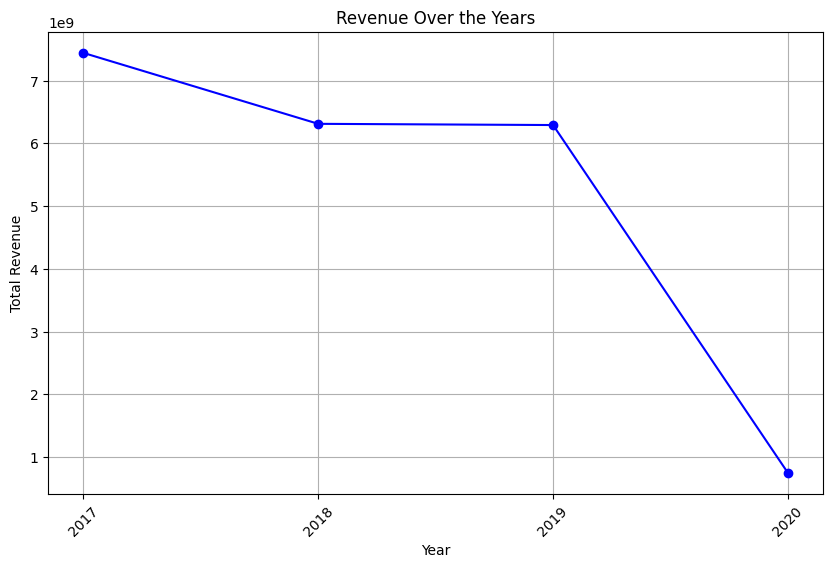

In [14]:
import matplotlib.pyplot as plt
# box office visualizations
# Group by year and sum the revenue
revenue_by_year = df_mojo.groupby('movie_year')['domestic'].sum()

# Plot the revenue over the years
plt.figure(figsize=(10, 6))
revenue_by_year.plot(kind='line', marker='o', color='blue')
plt.title("Revenue Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.xticks(revenue_by_year.index, rotation=45)
plt.show()

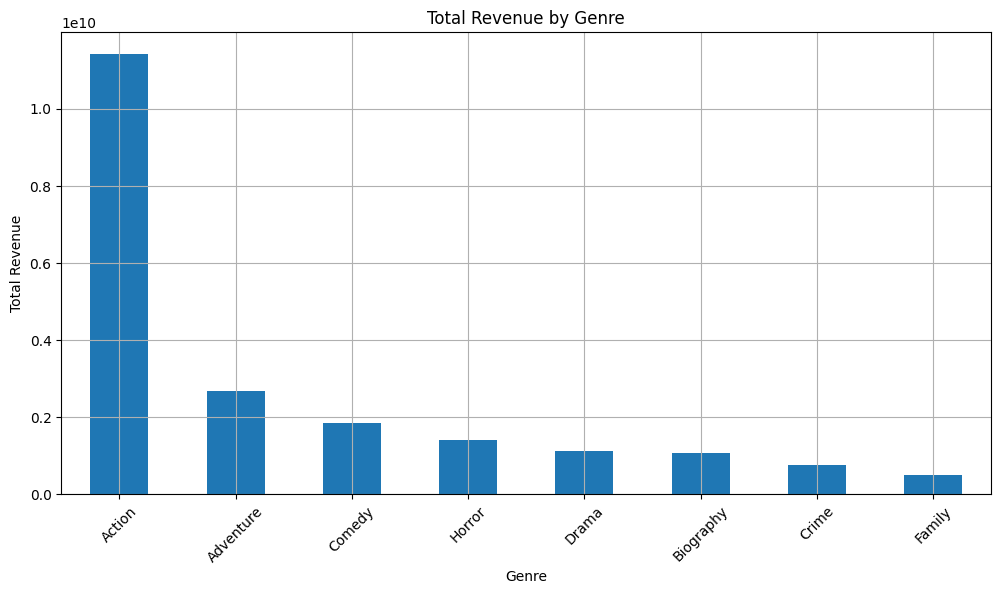

In [15]:
revenue_by_genre = df_mojo.groupby('genre_1')['domestic'].sum().sort_values(ascending=False)

# Plot the revenue by genre as a bar plot
plt.figure(figsize=(12, 6))
revenue_by_genre.plot(kind='bar')
plt.title("Total Revenue by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

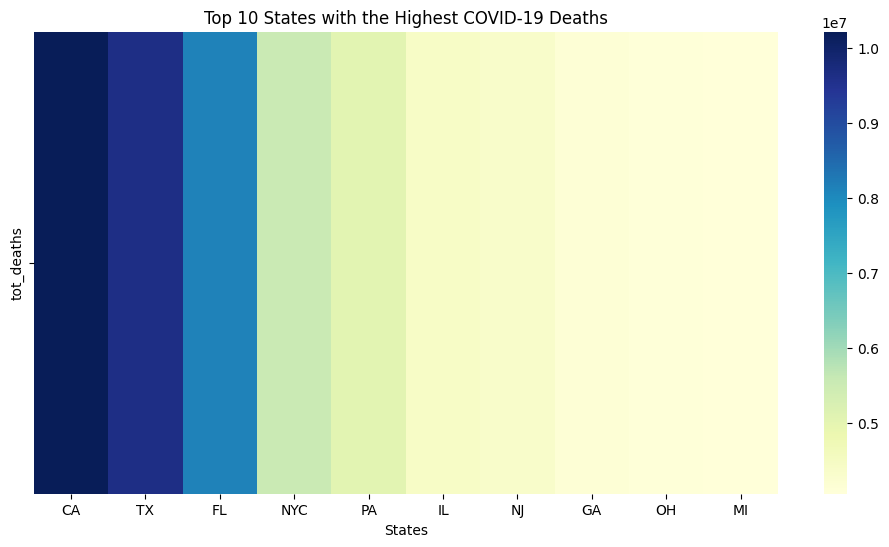

In [16]:
#covid visualizations
import seaborn as sns
deaths_by_state = df_covid.groupby('state')['tot_deaths'].sum().reset_index()

# Get the top 10 states with the highest deaths
top_10_states = deaths_by_state.nlargest(10, 'tot_deaths')

# Create a pivot table with 'state' as the index and 'covid_deaths' as values
heatmap_data = top_10_states.set_index('state').transpose()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', cbar=True, fmt='g')
plt.title("Top 10 States with the Highest COVID-19 Deaths")
plt.ylabel("")
plt.xlabel("States")
plt.show()

/var/folders/0y/my8j40tn1877cr3k7szjf6280000gn/T/ipykernel_84260/1893293118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_deaths['case_to_death_ratio'] = df_covid_deaths['tot_deaths'] / df_covid_deaths['tot_cases']


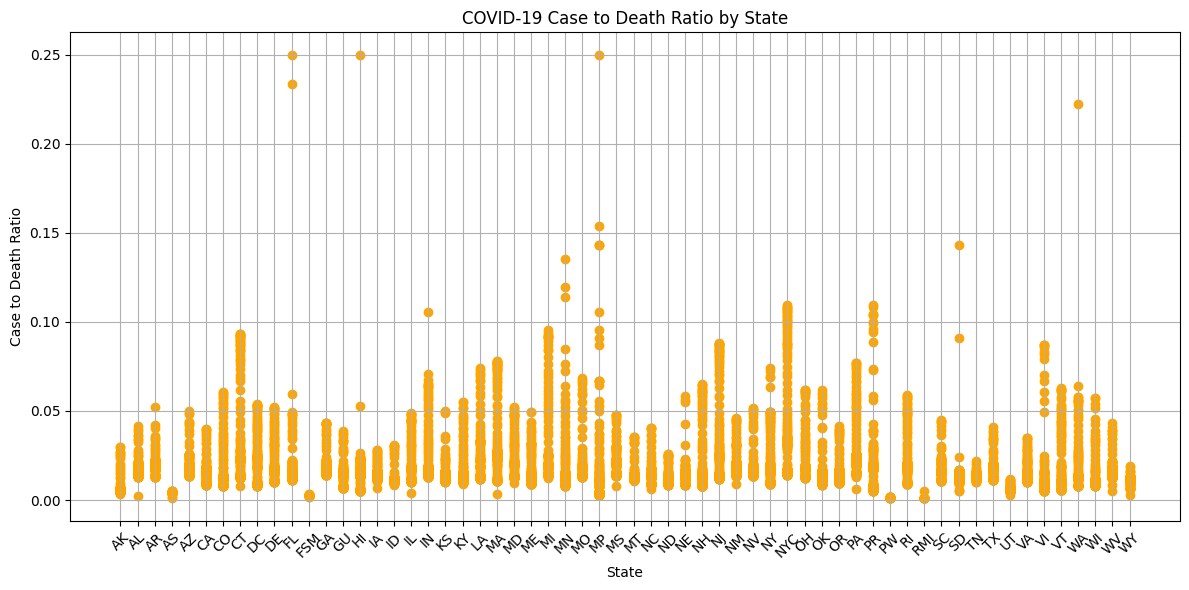

In [23]:
# Calculate the case to death ratio (handling division by zero)
df_covid_deaths = df_covid[(df_covid["tot_deaths"] > 0) & (df_covid["tot_cases"] > 0)]
df_covid_deaths['case_to_death_ratio'] = df_covid_deaths['tot_deaths'] / df_covid_deaths['tot_cases']

# Plot the scatter plot for case to death ratio by state
plt.figure(figsize=(12, 6))
plt.scatter(df_covid_deaths['state'], df_covid_deaths['case_to_death_ratio'], color='orange')

# Customize the plot
plt.title("COVID-19 Case to Death Ratio by State")
plt.xlabel("State")
plt.ylabel("Case to Death Ratio")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [24]:
df_covid_deaths

,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,year,case_to_death_ratio
9,AK,2020-03-19,2020-03-25,63.0,52.0,1.0,1.0,2020,0.015873
10,AK,2020-03-26,2020-04-01,149.0,86.0,3.0,2.0,2020,0.020134
11,AK,2020-04-02,2020-04-08,235.0,86.0,7.0,4.0,2020,0.029787
12,AK,2020-04-09,2020-04-15,300.0,65.0,9.0,2.0,2020,0.030000
13,AK,2020-04-16,2020-04-22,337.0,37.0,9.0,0.0,2020,0.026706
...,...,...,...,...,...,...,...,...,...
10375,WY,2023-04-06,2023-04-12,186284.0,158.0,2023.0,3.0,2023,0.010860
10376,WY,2023-04-13,2023-04-19,186399.0,115.0,2027.0,4.0,2023,0.010875
10377,WY,2023-04-20,2023-04-26,186539.0,140.0,2030.0,3.0,2023,0.010882
10378,WY,2023-04-27,2023-05-03,186668.0,129.0,2031.0,1.0,2023,0.010880


In [18]:
# Convert the 'start_date' column back to datetime format if it is currently in date format
df_covid['start_date'] = pd.to_datetime(df_covid['start_date'])

# Extract the year from the 'start_date' column
df_covid['year'] = df_covid['start_date'].dt.year

df_covid

,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,year
0,AK,2020-01-16,2020-01-22,0.0,0.0,0.0,0.0,2020
1,AK,2020-01-23,2020-01-29,0.0,0.0,0.0,0.0,2020
2,AK,2020-01-30,2020-02-05,0.0,0.0,0.0,0.0,2020
3,AK,2020-02-06,2020-02-12,0.0,0.0,0.0,0.0,2020
4,AK,2020-02-13,2020-02-19,0.0,0.0,0.0,0.0,2020
...,...,...,...,...,...,...,...,...
10375,WY,2023-04-06,2023-04-12,186284.0,158.0,2023.0,3.0,2023
10376,WY,2023-04-13,2023-04-19,186399.0,115.0,2027.0,4.0,2023
10377,WY,2023-04-20,2023-04-26,186539.0,140.0,2030.0,3.0,2023
10378,WY,2023-04-27,2023-05-03,186668.0,129.0,2031.0,1.0,2023


In [19]:
df_mojo.rename(columns={'movie_year': 'year'}, inplace=True)
df_mojo

,movie_title,year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,international,worldwide,mpaa,run_time,genre_1,genre_2
800,Motherless Brooklyn,2019,Edward Norton,Jonathan Lethem,Michael Bederman,Daniel Pemberton,Dick Pope,Edward Norton,Gugu Mbatha-Raw,Alec Baldwin,Bobby Cannavale,26000000,9277736,9200000,18477736,R,2 hr 24 min,Crime,Drama
973,Alita: Battle Angel,2019,Robert Rodriguez,James Cameron,James Cameron,Junkie XL,Bill Pope,Rosa Salazar,Christoph Waltz,Jennifer Connelly,Mahershala Ali,170000000,85710210,319142333,404852543,PG-13,2 hr 2 min,Action,Adventure
999,Shazam!,2019,David F. Sandberg,Henry Gayden,Peter Safran,Benjamin Wallfisch,Maxime Alexandre,Zachary Levi,Mark Strong,Asher Angel,Jack Dylan Grazer,100000000,140371656,225600000,365971656,PG-13,2 hr 12 min,Action,Adventure
1014,Wonder Woman,2017,Patty Jenkins,Allan Heinberg,Charles Roven,Rupert Gregson-Williams,Matthew Jensen,Gal Gadot,Chris Pine,Robin Wright,Lucy Davis,149000000,412563408,409283604,821847012,PG-13,2 hr 21 min,Action,Adventure
1130,CHIPS,2017,Dax Shepard,Rick Rosner,Ravi D. Mehta,Fil Eisler,Mitchell Amundsen,Michael Peña,Dax Shepard,Vincent D'Onofrio,Rosa Salazar,25000000,18600152,8200000,26800152,R,1 hr 40 min,Action,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,21 Bridges,2019,Brian Kirk,Adam Mervis,Chadwick Boseman,Alex Belcher,Paul Cameron,Chadwick Boseman,Sienna Miller,J.K. Simmons,Stephan James,33000000,28539757,21400000,49939757,R,1 hr 39 min,Action,Crime
2472,Knives Out,2019,Rian Johnson,Rian Johnson,Ram Bergman,Nathan Johnson,Steve Yedlin,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,40000000,165363234,146189956,311553190,PG-13,2 hr 11 min,Comedy,Crime
2473,Unplanned,2019,Chuck Konzelman,Abby Johnson,Chris Jones,Stephen Blake Kanicka,Drew Maw,Ashley Bratcher,Brooks Ryan,Robia Scott,Jared Lotz,6000000,19005109,2046806,21051915,R,1 hr 49 min,Biography,Drama
2474,Playing with Fire,2019,Andy Fickman,Dan Ewen,Todd Garner,Nathan Wang,Dean Semler,John Cena,Keegan-Michael Key,John Leguizamo,Tyler Mane,29900000,44451847,24179822,68631669,PG,1 hr 36 min,Comedy,Family


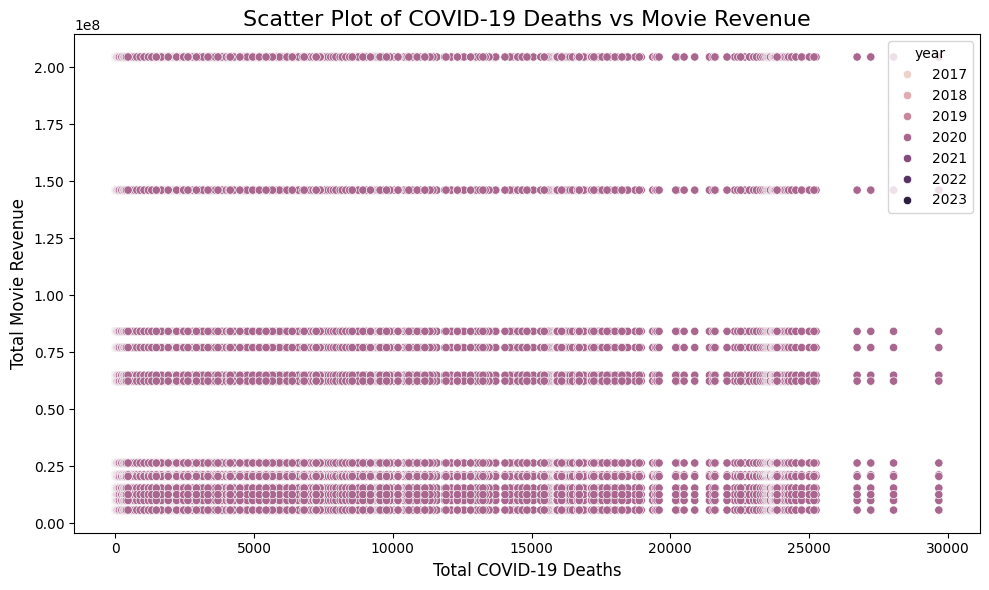

In [27]:
import matplotlib.pyplot as plt
# Merge the two datasets based on 'year' column
df_combined = pd.merge(df_covid, df_mojo, on='year', how='outer')

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Create a scatter plot using seaborn (or you can use plt.scatter)
sns.scatterplot(x='tot_deaths', y='domestic', hue='year', data=df_combined)

# Set the title and labels
plt.title("Scatter Plot of COVID-19 Deaths vs Movie Revenue", fontsize=16)
plt.xlabel("Total COVID-19 Deaths", fontsize=12)
plt.ylabel("Total Movie Revenue", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [28]:
df_combined["year"]

0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
47322    2023
47323    2023
47324    2023
47325    2023
47326    2023
Name: year, Length: 47327, dtype: int64